In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time


In [2]:
#La fonction f:
def f_sin(x):
    Y=(np.pi**2)*np.sin(np.pi*x)
    return Y

In [3]:
def J(u, A, fx):
    Au = np.dot(A, u)
    Au_u = np.dot(np.transpose(Au),u)
    fx_u = np.dot(np.transpose(fx),u)
    Y=(1/2)*Au_u - fx_u
    return Y

def DJ(u, A, fx):
    Au = np.dot(A,u)
    Y=Au - fx
    return (Y)

In [4]:
# Definir les fonctions f, g et solution_minimisation_sous_contraintes
n = 100

f = lambda x :np.ones(np.shape(x))
g = lambda x :np.maximum(1.5-20*(x-0.6)**2, 0)

#Pas de subdivision:
h = 1/(n + 1)
#La matrice A:
A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()


def solution_minimisation_sous_contraintes(f,g,J,DJ,n):
    u = np.zeros((n,))
    x = np.linspace(0,1,n+2)    
    xv = x [1: -1]
    fv = np.array ([ f( e ) for e in xv ])
    gv = np.array ([ g ( k ) for k in xv ])
    h=1/(n+1)
    A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
    
    Jf = lambda u : J(u, A, fv)
    DJf = lambda u : DJ(u, A, fv)
    
    const = ({ 'type':'ineq', 'fun':(lambda u : (u-gv.reshape((n,)))) ,
              'jac':(lambda u : np.eye(np.size(u))) })

    res = minimize(Jf , u, method = 'SLSQP', jac = DJf , constraints = const ,
                   tol = 10**(-8) , options = {'disp': True , 'maxiter': 5000})
    return(res.x)

************************n= 2 ************************
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11.296388888888895
            Iterations: 7
            Function evaluations: 10
            Gradient evaluations: 7
************************n= 5 ************************
Optimization terminated successfully    (Exit mode 0)
            Current function value: 23.531944444778247
            Iterations: 9
            Function evaluations: 16
            Gradient evaluations: 9
************************n= 50 ************************
Optimization terminated successfully    (Exit mode 0)
            Current function value: 214.4550805780585
            Iterations: 64
            Function evaluations: 241
            Gradient evaluations: 63
************************n= 100 ************************
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 425.0036617613788
            Iterations: 214
         

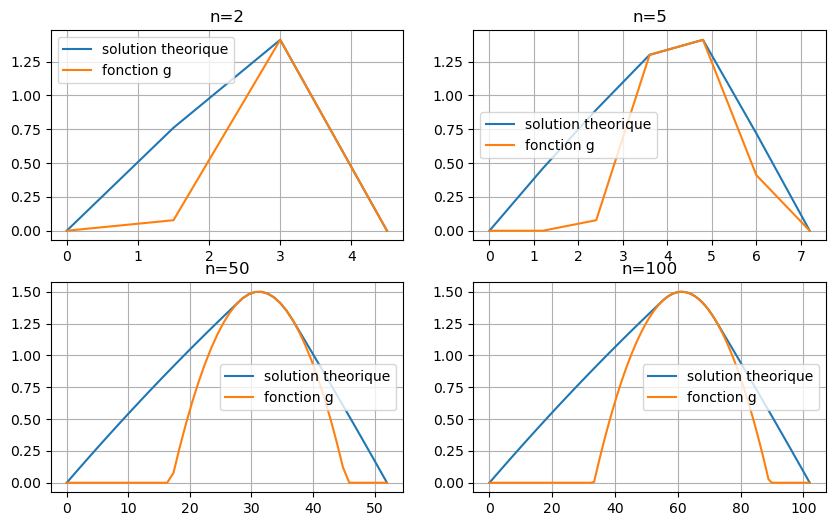

In [20]:
R1=np.zeros((4,102))
L=np.zeros((4,102))
k1=0
for n in [2, 5,50,100]:
    h=1/(n+1)
    print("************************n=",n,"************************")
    u=solution_minimisation_sous_contraintes(f,g,J,DJ,n)
    X=[i*h for i in range(0,n+2)]
    Y=np.zeros(n+2)
    Y[0]=0
    Y[-1]=0
    Y[1:n+1]=u
    G=[g(x) for x in X]
    for i in range(n+2):
        R1[k1,i]=Y[i]
        L[k1,i]=G[i]
    k1=k1+1
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
h=[2, 5,50,100]

for i, ax in enumerate(axs.flatten()):
    n=h[i]
    X=[j*(1/n+1) for j in range(0,n+2)]
    ax.plot(X, [R1[i,k] for k in range(n+2)],label="solution theorique")
    ax.plot(X, [L[i,k] for k in range(n+2)],label="fonction g")
    ax.set_title('n='+str(n))
    ax.legend()
    ax.grid(True)



    

In [19]:
print(L)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 425.0036617613788
            Iterations: 214
            Function evaluations: 998
            Gradient evaluations: 210
Optimization terminated successfully    (Exit mode 0)
            Current function value: -177.60589779142458
            Iterations: 115
            Function evaluations: 513
            Gradient evaluations: 115


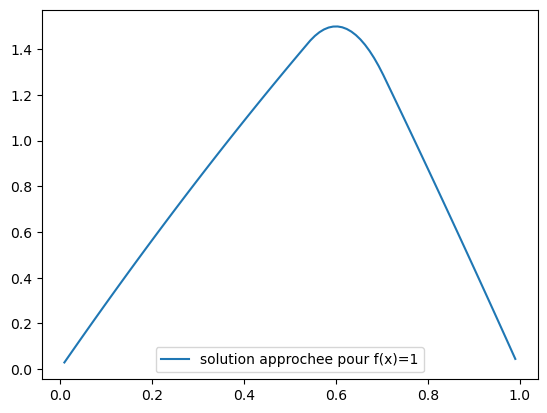

In [6]:
u=solution_minimisation_sous_contraintes(f,g,J,DJ,n)
u_sin=solution_minimisation_sous_contraintes(f_sin,g,J,DJ,n)
x = np.linspace(0,1,n+2)    
xv = x [1: -1]
fv = np.array ([ f( e ) for e in xv ])
plt.plot (xv , u , label ='solution approchee pour f(x)=1')
#plt.plot (xv , u_sin , label ='solution approchee pour f(x)=π^2*sin(πx)')
plt.legend()

In [7]:
def projK(u,gn):
    return [max([u[i],gn[i]]) for i in range(np.shape(u)[0])]

In [8]:
iterMax=1000
rho=0.1
Tol=10**(-5)
u0=[8,4]
store=1

def f(x):
    return 1 
def g(x):
    return max(1.5-20*(x-0.6)**2,0)

 #Dimension de l'espace:
n=2
 #Pas de subdivision:
h = 1/(n + 1)
 #La matrice A:
A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
 #Subdivision de l'intervalle [0,1]:
x=np.ones((n+2,1))
for i in range(0,n+2):
    x[i]=i*h
 #Le vecteur b:
b=np.ones((n,1))
for i in range(1,n):
    b[i]=f(x[i])  

In [9]:
def  gradient_projete_pas_fixe (J, DJ , gn , u0 , rho , Tol , iterMax , store ) :
    uk=u0
    u_vect=np.zeros((np.shape(uk)[0],1))
    u_vect[:,0]=uk
    U=[]
    U.append(uk)
    k=0
    rk=Tol
    while(rk>=Tol)and(k<=iterMax):
        u_vect[:,0]=uk
        wk=-(DJ(u_vect,A,b)).flatten()
        uk=projK(uk+rho*wk,gn)
        #uk=[max((uk+rho*wk)[i],gn[i]) for i in range(np.shape(uk)[0])]
        U.append(uk)
        rk=np.linalg.norm(rho*wk)
        k=k+1
    if store==0 : 
        return [uk,k]
    elif store==1 : 
        return [U,k]


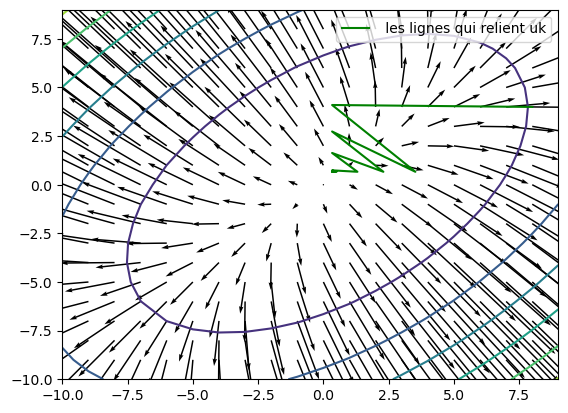

In [10]:
#  données  sont bidimensionnelles et on veut  représenter dans un espace 3D
x_vals = np.arange(-10, 10, 1)
y_vals = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x_vals, y_vals)
Z=(2*X**2-2*Y*X+2*Y**2)*4.5-X*f(1/3)-X*f(2/3)
X_d,Y_d=np.array([(4*X-2*Y)*4.5-f(1/3),(4*Y-2*X)*4.5-f(2/3)])
plt . contour (X ,Y , Z )
plt . quiver (X ,Y , X_d , Y_d , scale=1000)
gn=[h*i for i in range(1,n+1)]

U1,k1=gradient_projete_pas_fixe (J, DJ , gn , u0 , rho , Tol , iterMax , store )
Ux1=[r[0] for r in U1]
Uy1=[r[1] for r in U1]
plt.plot(Ux1,Uy1,label=" les lignes qui relient uk",color="green")
plt.legend()

plt.show()
# les 3 derinieres points de 6 seront faites apres 

In [11]:
def calcul_temp_execution_nbr_iter(J, DJ , gn , u0 , rho , Tol , iterMax , store ):
    start_time = time.time()
    uk,k1=gradient_projete_pas_fixe (J, DJ , gn , u0 , rho , Tol , iterMax , store )
    end_time = time.time()
    return [end_time - start_time,k1,uk]


************* pour n=  5 ***************

 le nombre d'itérations : 1001 
 temps de calcul :  0.013546228408813477

************* pour n=  20 ***************

 le nombre d'itérations : 1001 
 temps de calcul :  0.01961970329284668

************* pour n=  50 ***************

 le nombre d'itérations : 427 
 temps de calcul :  0.01267099380493164

************* pour n=  100 ***************

 le nombre d'itérations : 234 
 temps de calcul :  0.01852726936340332


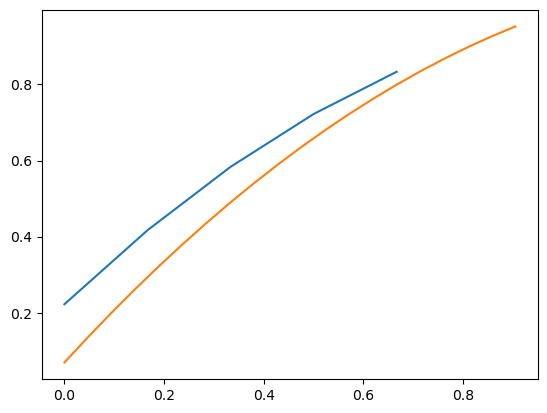

In [12]:
#temps d'execution
store=0
iterMax=1000
Tol=10**(-5)
rho=0.001
k=0
for n in [5, 20,50,100]:
    u0=[]
     #Pas de subdivision:
    h = 1/(n + 1)
     #La matrice A:
    A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
     #Subdivision de l'intervalle [0,1]:
    x=np.ones((n+2,1))
    for i in range(0,n+2):
        x[i]=i*h
     #Le vecteur b:
    b=np.ones((n,1))
    for i in range(1,n):
        b[i]=f(x[i])  
    gn=[h*i for i in range(1,n+1)]
    for i in range(n):
        if i % 2 == 0:
            u0.append(8)
        else:
            u0.append(4)
    #u0=np.zeros(n)
    
    t_fixe,k1,uk=calcul_temp_execution_nbr_iter(J, DJ , gn , u0 , rho , Tol , iterMax , store )
    print("\n************* pour n= ",n,"***************\n\n le nombre d'itérations :",k1,"\n temps de calcul : ", t_fixe)
    X=[i*h for i in range(0,n)]
    plt.plot(X,uk)
    k=k+1
plt . show ()


In [13]:
#travail rouri penalisation

In [14]:
#ReDefinition des variables:
store=1

def f(x):
    return 1 
def g(x):
    return np.maximum(1.5-20*(x-0.6)**2,0)

 #Dimension de l'espace:
n=2
 #Pas de subdivision:
h = 1/(n + 1)
 #La matrice A:
A = (1/(h**2))*diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
 #Subdivision de l'intervalle [0,1]:
x=np.ones((n+2,1))
for i in range(0,n+2):
    x[i]=i*h
xv = x [1: -1]
 #Le vecteur b:
b=np.ones((n,1))
for i in range(1,n):
    b[i]=f(x[i])  

In [15]:
#Definition de la fonction lambda du probleme dual:
def Lambda_dual(u,lamda):
    y=J(u, A, b)+sum([lamda[i]*(g(i)-u[i]) for i in range(np.shape(u)[0])])
    return y

#Definition de la fonction grad lambda du probleme dual:
def Lambda_dual_grad(u,lamda):
    u_vect=np.zeros((np.shape(u)[0],1))
    u_vect[:,0]=u
    y=DJ(u_vect, A, b).flatten()-lamda
    return y

In [16]:
#Methode du gradient a pas fixe pour la fonction lambda
def grad_pas_fixe_lambda(lamda, u0, rho, epsilon=10**(-6), Max_iter=1000) :
    k = 0
    ue=u0.copy()
    epsilon = Tol
    #Boucle:
    while ((epsilon >= Tol)and(k <=Max_iter)) :
        d=-1*Lambda_dual_grad(ue,lamda)
        up=ue
        ue=ue+rho*d
        epsilon=np.linalg.norm(up-ue)
        k = k + 1
    return ue

In [17]:
def Uzawa(u0,lamda0, gx, rho=0.01, Tol=10**(-6), Max_iter=1000):
    u = u0.copy()
    k = 0
    err = Tol
    lamda=lamda0.copy()
    while err >= Tol and k <= Max_iter:
        # Calculer u(k+1) minimiseur de la fonction lambda
        u_new = grad_pas_fixe_lambda(lamda, u, rho)
        
        # Mise a jour λ(k+1)
        lambda_new = np.maximum(lamda + rho * (gx- u_new), 0)
        
        # Calculate rk+1
        err = np.linalg.norm(u_new - u)
        
        # Mise a jour u et Incrémenter le compteur
        u = u_new
        k = k+1
    
    return u

In [18]:
#script_uzawa.py
n=2
gv = np.array ([ g ( k ) for k in xv ])
u0=np.zeros((n,))
lamda0=np.zeros(np.shape(u0)[0])
u=Uzawa(u0,lamda0, gv)
print(u)

[0.1111044 0.1111044]
